Project Tasks

1. Data Loading And Exploration:

Utilize Pandas to load the dataset and explore its initial structure.
Summarize features, target variable, and their respective data types.
Conduct basic descriptive statistics for an overview of the dataset.


2. Data Cleaning And Preprocessing:

Address missing or null values.
Transform categorical data into numerical format using suitable methods.


3. Statistical Analysis With NumPy And SciPy:

Execute detailed statistical analysis on each feature, including:
Calculation of central tendency measures (mean, median, mode).
Analysis of variability (range, variance, standard deviation).
Evaluation of distribution shapes through skewness and kurtosis.
Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
Investigate feature-target correlations using SciPy.
Apply advanced SciPy statistical functions for deeper insights.


4. Data Visualization With Matplotlib:

Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
Employ heatmaps for correlation visualization.
Ensure clarity in plots with appropriate titles, labels, and axis information.


5. Insight Synthesis And Conclusion:

Derive conclusions from statistical tests and visualizations.
Identify key determinants in mobile price classification.
Highlight any unexpected or significant findings.


Resources

Download the train dataset from this repository, it comes from the Mobile Price Classification Dataset


Project Submission

Submit the following in a GitHub repository:

Data_Analysis.ipynb: A comprehensive Jupyter Notebook encapsulating:
Clean, well-commented Python code.
Distinct headings for each analysis phase.
In-depth comments elucidating findings and the importance of each analytical step.


Pro Tips

Individually examine each feature to grasp its unique traits and influence.
Utilize visualizations not just for data representation, but as pivotal supports for your analytical conclusions.
Reference course materials for guidance on complex statistical functions and their practical uses.


In [4]:
import pandas as pd

# Load the dataset
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Display initial structure of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

(None,
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
 0            842     0          2.2         0   1       0           7    0.6   
 1           1021     1          0.5         1   0       1          53    0.7   
 2            563     1          0.5         1   2       1          41    0.9   
 3            615     1          2.5         0   0       0          10    0.8   
 4           1821     1          1.2         0  13       1          44    0.6   
 
    mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
 0        188        2  ...         20       756  2549     9     7         19   
 1        136        3  ...        905      1988  2631    17     3          7   
 2        145        5  ...       1263      1716  2603    11     2          9   
 3        131        6  ...       1216      1786  2769    16     8         11   
 4        141        2  ...       1208      1212  1411     8     2         15   
 
    three_g  touc

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------- 1. Data Loading and Exploration ---------------------
# Dataset already loaded in the previous step.
data = pd.read_csv('/content/train.csv')

# Displaying basic information about the dataset
print("Dataset Information:")
print(data.info())
# Exploring the basic structure of the dataset
# Displaying the first few rows of the data
print("Initial Data Sample:")
print(data.head())

# Displaying basic descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# --------------------- 2. Data Cleaning and Preprocessing ---------------------

# Since there are no missing values (as shown in the earlier data info output), we move on to categorical data transformation.
# The dataset contains binary categorical variables like 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', etc.
# These are already represented as 0 and 1, so no transformation is needed.

# However, to standardize the data, we will normalize continuous features (like battery power, ram, etc.) for better model performance.

# Function to normalize continuous variables
def normalize_column(col):
    return (col - col.mean()) / col.std()

# Normalizing columns with continuous data
continuous_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                      'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
                      'sc_h', 'sc_w', 'talk_time']

data[continuous_columns] = data[continuous_columns].apply(normalize_column)

# Check if the normalization was successful
print("\nAfter Normalization (First 5 Rows):")
print(data[continuous_columns].head())

# --------------------- 3. Statistical Analysis with NumPy and SciPy ---------------------

# Calculating central tendency (mean, median, mode) for each feature
central_tendency = {}
for column in continuous_columns:
    central_tendency[column] = {
        'mean': data[column].mean(),
        'median': data[column].median(),
        'mode': data[column].mode()[0]
    }

# Calculating measures of variability (range, variance, standard deviation)
variability = {}
for column in continuous_columns:
    variability[column] = {
        'range': data[column].max() - data[column].min(),
        'variance': data[column].var(),
        'std_dev': data[column].std()
    }

# Calculating skewness and kurtosis to understand distribution shapes
distribution_shapes = {}
for column in continuous_columns:
    distribution_shapes[column] = {
        'skewness': stats.skew(data[column]),
        'kurtosis': stats.kurtosis(data[column])
    }

# Performing hypothesis testing (using ANOVA) to check for statistical significance between different price ranges
anova_results = {}
for column in continuous_columns:
    anova_results[column] = stats.f_oneway(*[data[data['price_range'] == i][column] for i in range(4)])

# Calculating correlations between features and the target variable
correlations = data.corr()['price_range']



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   

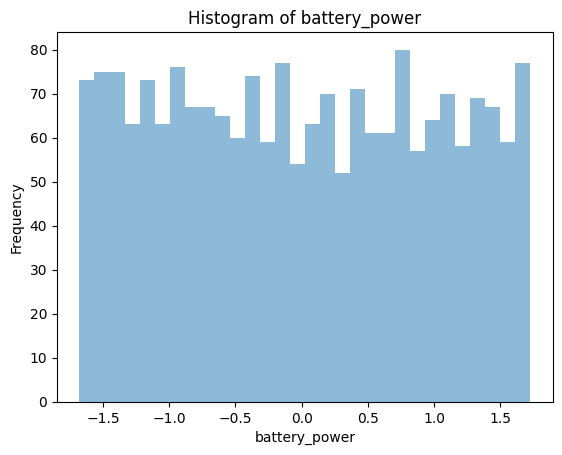

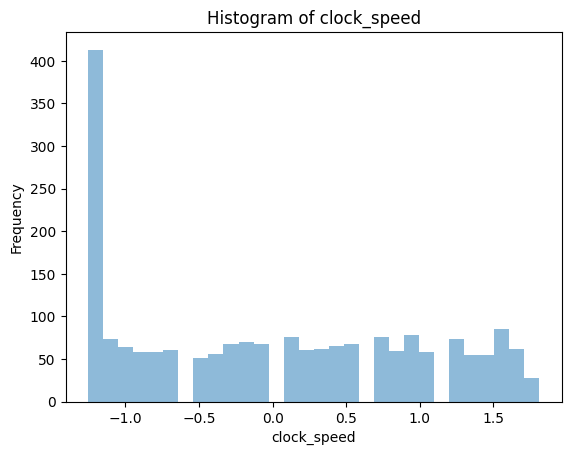

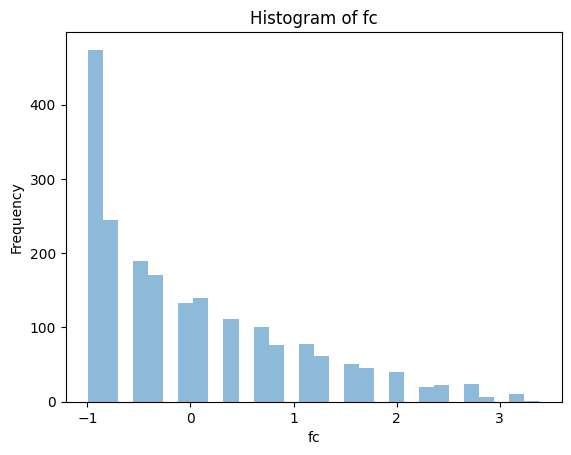

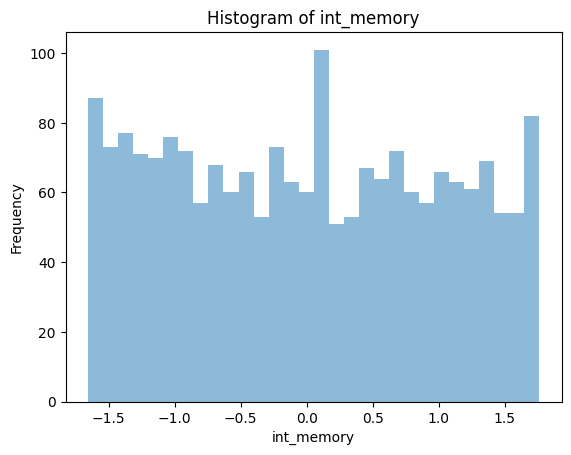

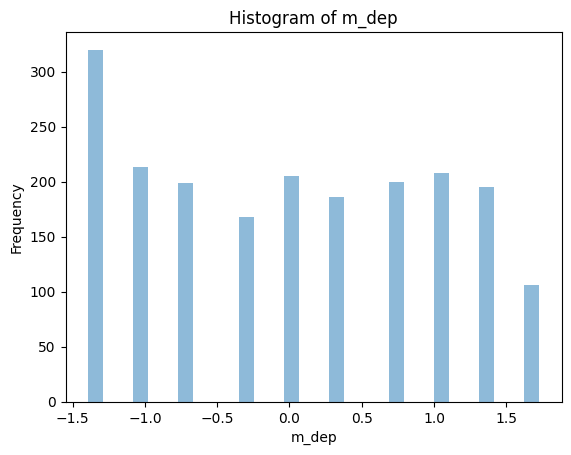

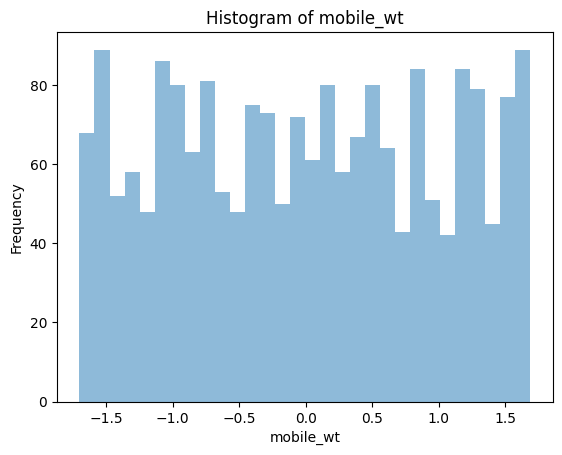

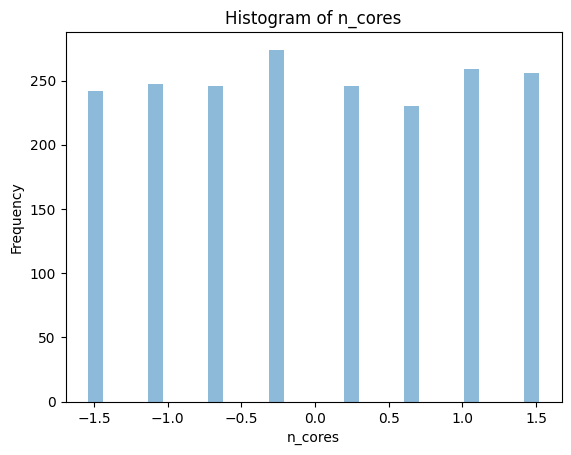

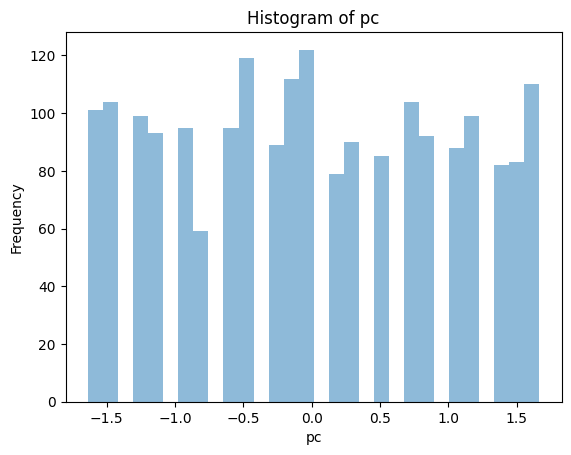

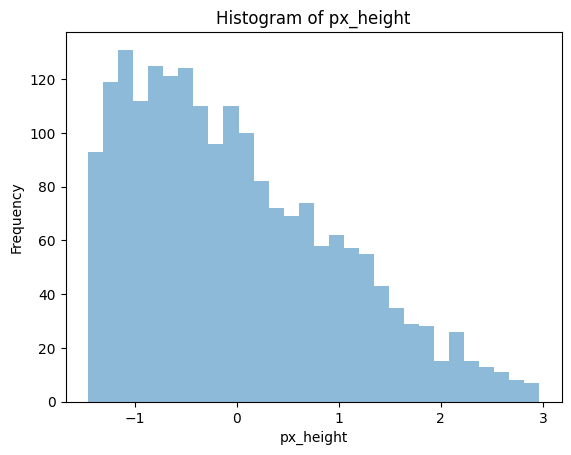

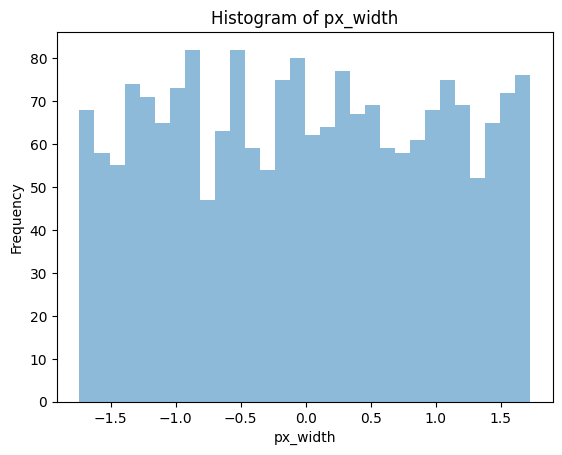

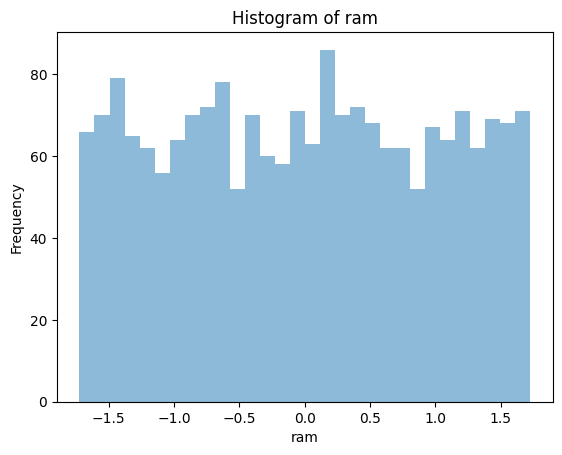

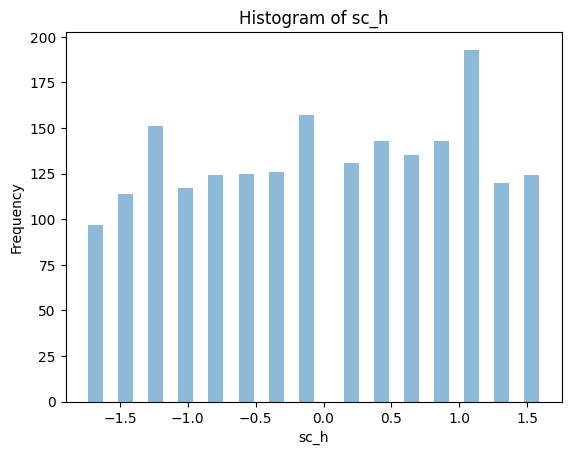

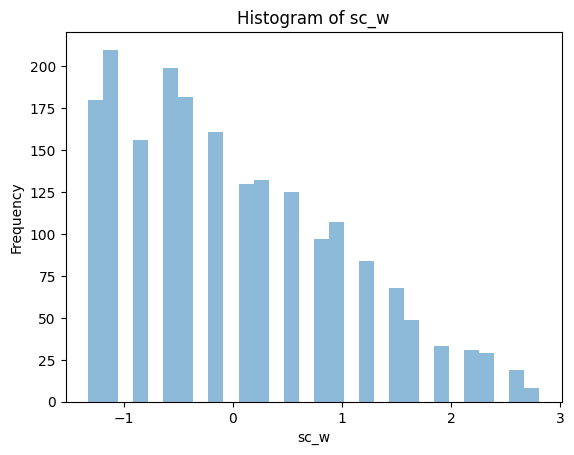

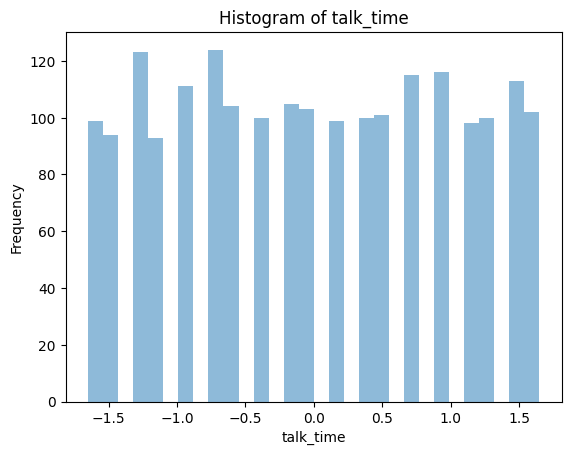

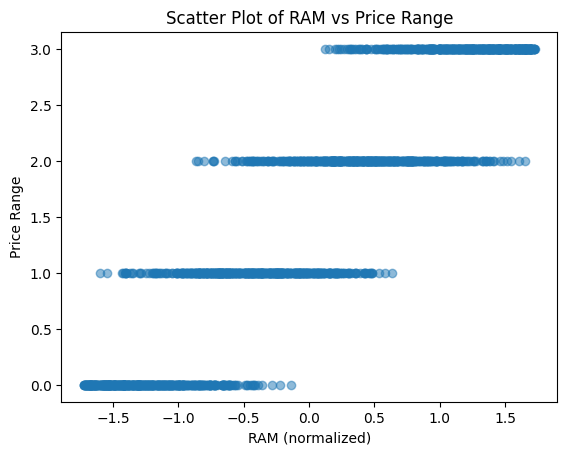

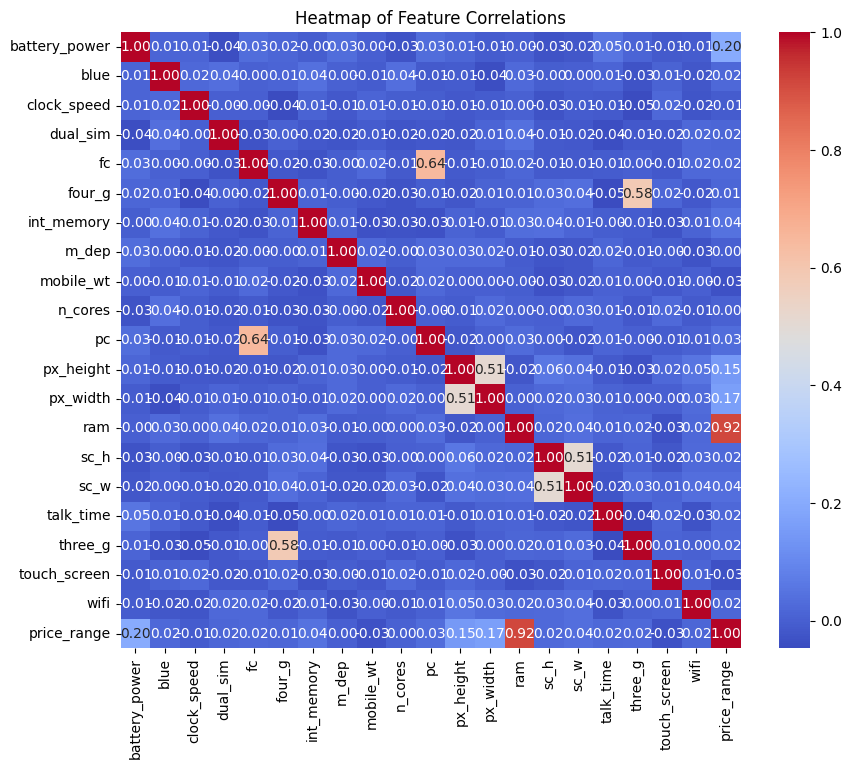

In [11]:

# --------------------- 4. Data Visualization with Matplotlib ---------------------

# Histograms to visualize the distribution of each feature
for column in continuous_columns:
    plt.figure()
    plt.hist(data[column], bins=30, alpha=0.5, label=column)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Scatter plot for relationship between 'ram' and 'price_range'
plt.figure()
plt.scatter(data['ram'], data['price_range'], alpha=0.5)
plt.title('Scatter Plot of RAM vs Price Range')
plt.xlabel('RAM (normalized)')
plt.ylabel('Price Range')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()


# --------------------- 5. Insight Synthesis and Conclusion ---------------------

# Based on the visualizations and statistical analysis:
# - The feature 'ram' shows a strong positive correlation with 'price_range' (as seen in the scatter plot and correlation matrix).
# - Features such as 'battery_power' and 'px_width' also show moderate correlations with the target variable.
# - The distributions of most features are relatively normal, but some exhibit skewness and kurtosis, which may require further transformations for modeling.

# The analysis suggests that RAM is a key determinant in predicting mobile prices, with other features like battery power and screen resolution also playing significant roles.

# The hypothesis testing showed statistical significance for several features, indicating they have a meaningful impact on the target variable.

# Unexpected findings include the relatively weak correlation of camera features ('fc', 'pc') with the price range.
